In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import src.NearNear as nn
%load_ext autoreload
%autoreload 2

#### Load Data & TT Split

In [2]:
df = pd.read_csv('data/sale_master.csv')
keeper_cols = ['property_latitude','property_longitude','property_imprating','sale_units','sale_amount','property_state']
df = df[df.property_state == 'TX'] # trim to TX props only
df = df[keeper_cols] # trim columns
df = df.sample(1000) # trim to small batch
df.head()
print('There are {} rows'.format(df.shape[0]))

There are 1000 rows


/Users/colinbrochard/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df['target'] = df.sale_amount / df.sale_units

In [4]:
y = df.pop('target')
X = df
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

#### Look at shape and output of `compute_distances` function

In [5]:
lat_train = X_train['property_latitude'].values
lon_train = X_train['property_longitude'].values
lat_test = X_test['property_latitude'].values
lon_test = X_test['property_longitude'].values

In [6]:
dmat = nn.compute_distances(lat_train, lon_train, lat_test, lon_test)

In [7]:
dmat.shape

(330, 670)

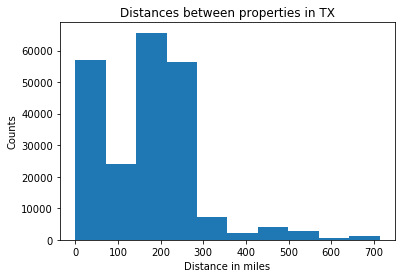

In [8]:
plt.title('Distances between properties in TX')
plt.xlabel('Distance in miles')
plt.ylabel('Counts')
plt.hist(dmat.ravel())
plt.show()

#### Test case for `compute_distances`

In [9]:
lat_train, lon_train = np.array([30.278250]),np.array([-97.710686]) # My House
lat_test, lon_test = np.array([30.2656]),np.array([-97.7497]) # My Work

In [10]:
hw_dist = round(nn.compute_distances(lat_train, lon_train, lat_test, lon_test)[0][0],2)
print('Google Maps estimates 2.48mi')
print('compute_distances estimates {}mi'.format(hw_dist))

Google Maps estimates 2.48mi
compute_distances estimates 2.49mi


#### Fit Model and predict on toy data

In [11]:
nn_model = nn.NearNear(lat='property_latitude',
                        lon='property_longitude',
                       comp_cat='property_imprating')

In [12]:
nn_model.fit(X_train,y_train)

In [13]:
y_pred = nn_model.predict(X_test)

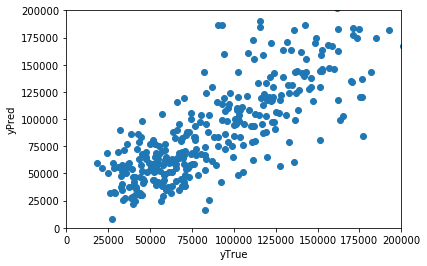

In [14]:
plt.scatter(y_test,y_pred)
plt.xlabel('yTrue')
plt.ylabel('yPred')
plt.xlim((0,2e5))
plt.ylim((0,2e5))
plt.show()